In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_X():
    df = pd.read_csv('./data_Fish_Mucus_BV_200115_actual data.csv')
    X = df[df.Stock.isin(['CULL', 'BROOD'])]
    X = X.drop(['ID', 'Class', 'Strain', 'Fork Length (cm)', 'Weight (kg)'], axis=1)
    return X

def sort_columns(X):
    sorted_columns = sorted([a.split('_') for a in X.drop(['Stock', 'Breeding Value'], axis=1).columns.values],
                        key=lambda x:(int(x[0][1]), int(x[1])), reverse=True)
    cutoff = [0]
    for i in range(1, len(sorted_columns)):
        if sorted_columns[i][0] != sorted_columns[i-1][0]:
            cutoff.append(i)
            
    return sorted_columns, cutoff, X[['_'.join((a,b)) for a,b in sorted_columns]].values

def extract(target='Breeding Value'):
    X_df = get_X()
    y_vals = X_df[target].values
    sorted_columns, cutoff, X_vals = sort_columns(X_df)
    
    return X_vals, y_vals, cutoff

In [4]:
table = pd.read_csv('./data_Fish_Mucus_BV_200115_actual data.csv')

In [29]:
table['Stock']

0                CULL
1                CULL
2                CULL
3                CULL
4                CULL
5                CULL
6                CULL
7                CULL
8                CULL
9                CULL
10               CULL
11               CULL
12               CULL
13               CULL
14               CULL
15               CULL
16               CULL
17               CULL
18               CULL
19               CULL
20               CULL
21               CULL
22                NaN
23               CULL
24               CULL
25              BROOD
26             BROOD 
27    BROOD - CONTROL
28              BROOD
29    BROOD - CONTROL
           ...       
70               CULL
71                NaN
72               CULL
73               CULL
74               CULL
75              BROOD
76              BROOD
77              BROOD
78              BROOD
79              BROOD
80              BROOD
81              BROOD
82    BROOD - CONTROL
83              BROOD
84        

In [38]:
np.sum(table['Class'] [table['Stock'] == 'BROOD'].apply(lambda x:'F' in x))

13

In [40]:
np.sum(table['Class'] [table['Stock'] == 'BROOD'].apply(lambda x:'F' not in x))

20

In [25]:
table['Stock']

0                CULL
1                CULL
2                CULL
3                CULL
4                CULL
5                CULL
6                CULL
7                CULL
8                CULL
9                CULL
10               CULL
11               CULL
12               CULL
13               CULL
14               CULL
15               CULL
16               CULL
17               CULL
18               CULL
19               CULL
20               CULL
21               CULL
22                NaN
23               CULL
24               CULL
25              BROOD
26             BROOD 
27    BROOD - CONTROL
28              BROOD
29    BROOD - CONTROL
           ...       
70               CULL
71                NaN
72               CULL
73               CULL
74               CULL
75              BROOD
76              BROOD
77              BROOD
78              BROOD
79              BROOD
80              BROOD
81              BROOD
82    BROOD - CONTROL
83              BROOD
84        

In [357]:
# df.isna().sum().sort_values(ascending=False).head(10)

In [358]:
# df.Stock.unique()

In [193]:
# According to Erin Legacki, Brood Control NOT selected based on breeding value
# Just want to compare Brood to Cull

In [359]:
# X = df[df.Stock.isin(['CULL', 'BROOD'])]

In [360]:
# X

In [361]:
# X.Strain.unique() # All same strain

In [362]:
# X = X.drop(['ID', 'Class', 'Strain', 'Fork Length (cm)', 'Weight (kg)'], axis=1)

In [363]:
# X.isna().sum().sort_values(ascending=False).head() # No NaN left

In [4]:
X = get_X()

In [5]:
X

,Stock,Breeding Value,B7_4994,B7_4875,B7_4525,B7_3616,B7_3503,B7_3393,B7_1522,B7_1093,...,B0_9047,B0_8992,B0_8938,B0_8825,B0_8759,B0_8651,B0_8562,B0_8515,B0_1677,B0_1468
0,CULL,397.0,131305.45310,144981.26560,142388.828100,96999.42188,156190.81250,95217.79688,29787.84375,112778.85940,...,110548.06250,122697.26560,139708.01560,103893.06250,246991.5469,215101.6875,65581.21875,26646.21875,86967.81250,20274.750000
1,CULL,-91.0,183441.31250,209126.93750,201864.062500,127183.81250,206881.21880,117774.50000,18977.25000,165255.56250,...,110431.21880,121501.68750,125174.62500,89302.81250,214140.1250,212868.2813,65850.68750,27119.37500,71080.46875,35608.625000
2,CULL,344.0,206015.93750,255455.95310,262075.812500,139335.82810,237417.71880,151135.73440,15748.59375,205730.31250,...,256810.57810,265815.42190,260946.79690,178281.76560,414871.1250,377639.4219,109138.48440,54492.51563,81977.62500,18493.968750
3,CULL,132.0,7692.09375,24164.28125,8611.937500,17506.75000,5935.12500,32927.78125,15251.34375,-13094.31250,...,71889.03125,69318.43750,86390.09375,53759.62500,138607.2500,153938.9063,46037.78125,9949.40625,69577.68750,30906.343750
4,CULL,81.0,123934.34380,135644.43750,130603.562500,66523.73438,131626.43750,76109.89063,31055.37500,101598.00000,...,135593.29690,144686.14060,149021.18750,102828.29690,245571.5469,234731.1563,61604.43750,27374.95313,74492.90625,26447.078130
5,CULL,429.0,290384.06250,347091.12500,355762.500000,194267.06250,329096.09380,206285.46880,29214.34375,280182.37500,...,127781.37500,147525.96880,165985.71880,131556.46880,293351.7813,269546.5625,78873.81250,36208.21875,107334.84380,27606.531250
6,CULL,-286.0,261019.51560,329700.28130,299399.375000,181392.60940,294012.71880,183316.59380,22588.98438,239955.81250,...,193689.48440,199850.82810,206418.28130,149919.35940,390524.2813,399034.0781,122480.87500,59434.90625,107830.29690,43734.062500
7,CULL,195.0,328016.31250,396385.40630,382876.718800,222742.93750,412153.03130,212401.68750,31094.68750,317184.06250,...,89041.59375,93681.90625,96268.50000,76213.40625,182045.8750,156460.0313,51217.96875,20244.75000,70463.96875,26667.031250
8,CULL,351.0,236282.50000,296350.21880,256868.796900,164860.62500,269298.64060,155648.15630,31185.42188,203687.71880,...,133576.56250,152403.65630,173485.48440,116418.89060,287908.5313,288285.5781,81752.18750,38785.71875,115929.03130,14783.312500
9,CULL,138.0,265450.21880,301020.81250,308198.343800,174483.40630,292474.81250,172620.93750,19889.06250,250961.56250,...,152058.15630,161631.31250,173007.00000,111558.46880,290437.6563,301213.2813,79094.25000,33810.00000,99867.28125,32941.968750


In [9]:
np.unique(X['Stock'], return_counts=True)

(array(['BROOD', 'CULL'], dtype=object), array([33, 48]))

In [8]:
# X.isnull().sum().sum() #==0

0

In [222]:
# Look at histogram of breeding values vs. class

In [223]:
import seaborn as sns

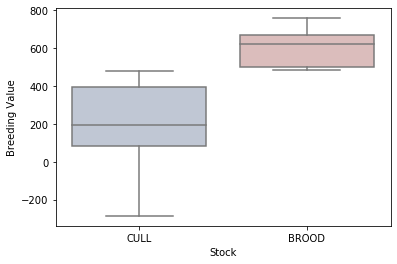

In [366]:
sns.boxplot(x="Stock", y="Breeding Value", data=X, palette="vlag")

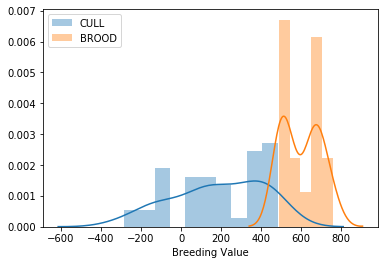

In [367]:
ax = sns.distplot(a=X[X.Stock == 'CULL']["Breeding Value"], bins=10, label='CULL')#, alpha=0.5)
_ = sns.distplot(a=X[X.Stock == 'BROOD']["Breeding Value"], bins=5, ax=ax, label='BROOD')#, alpha=0.5)
_ = ax.legend()

In [368]:
# Appear to be disjoint so there is a discrete threshold being used it seems

In [369]:
# Lets try PLS to try to predict breeding value as a discrete value
# Later can also do classification 

In [370]:
X.shape

(81, 262)

In [230]:
# https://nirpyresearch.com/partial-least-squares-regression-python/

In [372]:
original = X
sorted_columns, cutoff = sort_columns(original)

# raw = original.drop('Stock', axis=1).values
y_ = original.Stock.values #raw[:,0]
X_ = original[['_'.join((a,b)) for a,b in sorted_columns]].values #raw[:,1:]

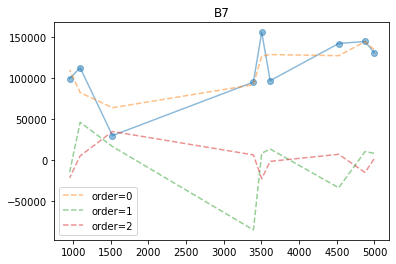

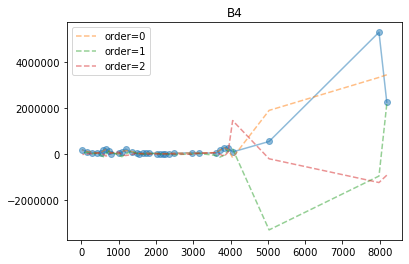

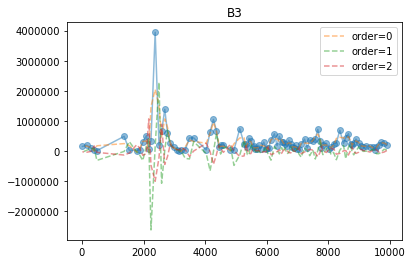

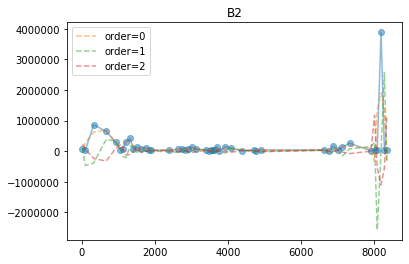

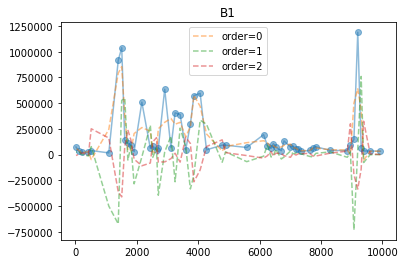

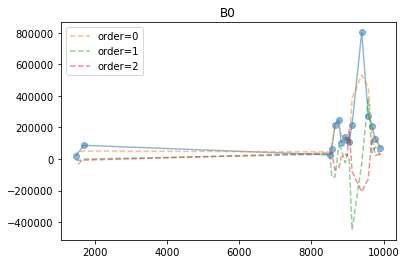

In [373]:
from scipy.signal import savgol_filter

inspect_row = 0
for idx in range(len(cutoff)):
    start = cutoff[idx]
    stop = cutoff[idx+1] if idx+1 < len(cutoff) else len(sorted_columns)
    freq = [int(sorted_columns[i][1]) for i in range(start, stop)]
    plt.figure()
    y = X_[inspect_row,start:stop]
    plt.plot(freq, y, 'o-', alpha=0.5)
    for order in [0,1,2]:
        y_sg = savgol_filter(y, 5, polyorder = 3, deriv=order, mode='nearest')
        plt.plot(freq, y_sg, '--', label='order={}'.format(order), alpha=0.5)
    plt.title(sorted_columns[start][0])
    plt.legend(loc='best')

In [328]:
def savgol_chunk(X, cutoff, scale=True, deriv=1):
    X = np.array(X) # in case
    
    X_filtered = []
    for idx in range(len(cutoff)):
        start = cutoff[idx]
        stop = cutoff[idx+1] if idx+1 < len(cutoff) else X.shape[1]
        y = savgol_filter(X[:,start:stop], 
                                      window_length=9, 
                                      polyorder=5, 
                                      deriv=deriv,
                         mode='nearest')
        if (scale):
            y = StandardScaler().fit_transform(y)
    
        X_filtered.append(y)
    
    return np.hstack(X_filtered)
    

In [342]:
X_f = savgol_chunk(X_, cutoff, scale=False, deriv=1)

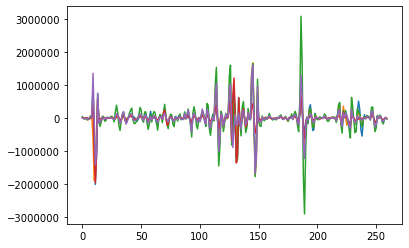

In [343]:
for i in range(5):
    plt.plot(X_f[i,:])

In [353]:
X_use_ = savgol_chunk(X_, cutoff, scale=True, deriv=1)
y_use_ = original['Breeding Value'].values
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_use_, 
                                                                            y_use_, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

print(r2_score(pls.predict(X_train), y_train), r2_score(pls.predict(X_test), y_test))

0.05762778367288801 -1.1014612600940952


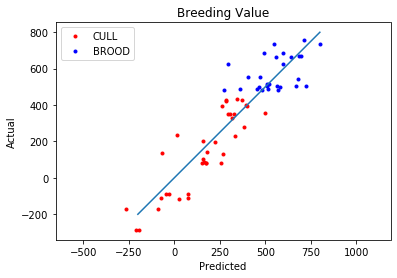

In [313]:
compare(pls, X_train, y_train, lim = 475)

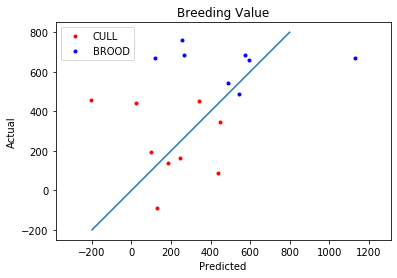

In [314]:
compare(pls, X_test, y_test, lim = 475)

In [ ]:
# should break up and do savgol filtering on each chunk (B0, B1, etc.)

In [113]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
import sklearn

# Process data
X_sg = savgol_filter(X, 9, polyorder = 5, deriv=1)
X_std = StandardScaler().fit_transform(X_sg)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_std, y, test_size=0.2, 
                                                                           random_state=0)

pls = PLSRegression(n_components=14)
pls.fit(X_train, y_train)

print(r2_score(pls.predict(X_train), y_train), r2_score(pls.predict(X_test), y_test))
# mse = mean_squared_error(y, y_cv)

0.8812115162700812 -0.3666389758810422


In [418]:
x_ = np.array(sorted(zip(np.arange(len(pls.coef_)), np.abs(pls.coef_)), key=lambda x:x[1], reverse=True))

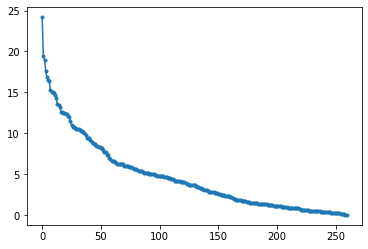

In [423]:
plt.plot([a[1][0] for a in x_], '.-')

In [114]:
pls.score(X_std, y)

0.6087754611515399

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline
def compare(model, X, y, lim = 475):
    plt.plot(model.predict(X[y < lim]), y[y < lim], '.', color='r', label='CULL')
    plt.plot(model.predict(X[y >= lim]), y[y >= lim], '.', color='b', label='BROOD')

    plt.axis('equal')
    x_ = np.linspace(-200, 800, 100)
    plt.plot(x_, x_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.legend(loc='best')
    plt.title('Breeding Value')

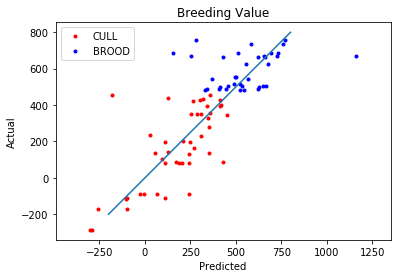

In [118]:
compare(pls, X_std, y)

In [393]:
# Nested CV to estimate generalization error
# Not much data, so don't do test/train split, just do CV

import sklearn
import copy
from sklearn.pipeline import Pipeline

# Extract data and split columns up into diff spectra
X, y, cutoff = extract('Breeding Value')
inner_k, outer_k = 3, 5

def prepend_(name, cv_grid): 
    return {name+'__'+k:v for k,v in copy.copy(cv_grid).items()}
    
class SavGolWrapper:
    def __init__(self, **kwargs):
        self.set_params(**kwargs)
        
    def set_params(self, **kwargs):
        self.__params = kwargs
        
    def transform(self, X):
#         return savgol_filter(X, **self.__params)
    
        cutoff = self.__params['cutoff']
        savgol_params = copy.copy(self.__params)
        del(savgol_params['cutoff'])
        X_filtered = []
        for idx in range(len(cutoff)):
            start = cutoff[idx]
            stop = cutoff[idx+1] if idx+1 < len(cutoff) else X.shape[1]
            y = savgol_filter(X[:, start:stop], **savgol_params)
            X_filtered.append(y)

        return np.hstack(X_filtered)
    
    def fit(self, X, y):
        return self
         
steps = [('Filter', SavGolWrapper(**{'polyorder':1, 
                                     'window_length':5, 
                                     'deriv':1, 
                                     'mode':'nearest'})),
         ('StandardScaler', StandardScaler()), 
         ('PLS', PLSRegression(n_components=1))]

filter_grid = {'polyorder':[1,2], 'window_length':[3,5,7], 'deriv':[0,1,2], 'cutoff':[cutoff]}
pls_grid = {'n_components':np.arange(1,5+1)}

inner_cv = sklearn.model_selection.KFold(n_splits=inner_k, shuffle=True, random_state=0)
outer_cv = sklearn.model_selection.KFold(n_splits=outer_k, shuffle=True, random_state=1)
    
pipeline = Pipeline(steps)
clf = sklearn.model_selection.GridSearchCV(estimator=pipeline,
                                       param_grid={**prepend_('Filter', filter_grid),
                                                   **prepend_('PLS', pls_grid)}, 
                                       cv=inner_cv,
                                       iid=False,
                                       n_jobs=-1)

nested_scores = sklearn.model_selection.cross_val_score(clf,
                                                        X=X, 
                                                        y=y, 
                                                        cv=outer_cv, 
                                                        n_jobs=1)

In [394]:
np.mean(nested_scores) # Not good at regression (worse than just perdicting the mean blindly)

-0.05790401793934887

In [395]:
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Filter',
                                        <__main__.SavGolWrapper object at 0x7f77a4075be0>),
                                       ('StandardScaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PLS',
                                        PLSRegression(copy=True, max_iter=500,
                                                      n_components=1,
                                                      scale=True, tol=1e-06))],
                                verbose=False),
             iid=False, n_jobs=-1,
             param_grid={'Filter__cutoff': [[0, 9, 43, 144, 191, 244]],
    

In [396]:
clf.best_params_

{'Filter__cutoff': [0, 9, 43, 144, 191, 244],
 'Filter__deriv': 2,
 'Filter__polyorder': 2,
 'Filter__window_length': 7,
 'PLS__n_components': 2}

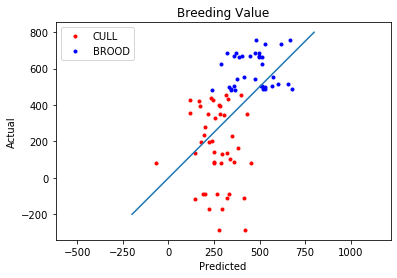

In [397]:
compare(clf, X, y)

In [398]:
from sklearn.decomposition import PCA, KernelPCA

In [44]:
raw = original.drop('Breeding Value', axis=1).values
X = raw[:,1:]
y = raw[:,0]

In [45]:
y

array(['CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL',
       'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL',
       'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL',
       'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD',
       'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'CULL',
       'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL',
       'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL',
       'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'CULL', 'BROOD',
       'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD',
       'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD',
       'BROOD', 'BROOD', 'BROOD', 'BROOD', 'BROOD'], dtype=object)

In [46]:
p = KernelPCA(n_components=2, kernel='cosine')
X_std = StandardScaler().fit_transform(X)
p.fit(X_std,y)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='cosine',
          kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [47]:
# p.explained_variance_ratio_

In [48]:
X_tr = p.transform(X_std)

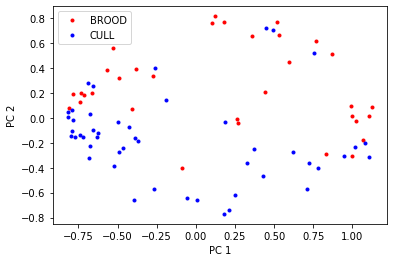

In [69]:
plt.plot(X_tr[y=='BROOD'][:,0], X_tr[y=='BROOD'][:,1], '.', color='r', label='BROOD')
plt.plot(X_tr[y=='CULL'][:,0], X_tr[y=='CULL'][:,1], '.', color='b', label='CULL')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')

In [50]:
from sklearn.linear_model import LogisticRegression

In [401]:
X, y, cutoff = extract('Stock')
    
steps = [('Filter', SavGolWrapper(**{'polyorder':1, 'window_length':5, 'deriv':1})),
         ('StandardScaler', StandardScaler()), 
         ('KernelPCA', KernelPCA()),
         ('LR', LogisticRegression())]

filter_grid = {'polyorder':[1,2,3], 'window_length':[5,7,9], 'deriv':[0,1,2], 'cutoff':[cutoff]}
kpca_grid = {'n_components':[1,3,5,7,9], 'kernel':['cosine', 'linear', 'poly', 'rbf', 'sigmoid'],
            'degree':[3,5,7], 'coef0':np.linspace(0,1,3)}
lr_grid = {'penalty':['none'], 'solver':['lbfgs'], 'class_weight':['balanced', None],
          'multi_class':['ovr'], 'max_iter':[500]}

inner_k, outer_k = 5, 5
inner_cv = sklearn.model_selection.KFold(n_splits=inner_k, shuffle=True, random_state=0)
outer_cv = sklearn.model_selection.KFold(n_splits=outer_k, shuffle=True, random_state=1)
    
pipeline = Pipeline(steps)
clf = sklearn.model_selection.GridSearchCV(estimator=pipeline,
                                       param_grid={**prepend_('Filter', filter_grid),
                                                   **prepend_('KernelPCA', kpca_grid),
                                                   **prepend_('LR', lr_grid)}, 
                                       cv=inner_cv,
                                       iid=False,
                                       n_jobs=-1)

nested_scores = sklearn.model_selection.cross_val_score(clf,
                                                        X=X, 
                                                        y=y, 
                                                        cv=outer_cv, 
                                                        n_jobs=1)

In [402]:
nested_scores

array([0.70588235, 0.875     , 0.875     , 0.75      , 0.875     ])

In [403]:
np.mean(nested_scores)

0.8161764705882353

In [404]:
np.std(nested_scores)

0.07338220558749792

In [405]:
clf.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Filter',
                                        <__main__.SavGolWrapper object at 0x7f77d56dc6d8>),
                                       ('StandardScaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('KernelPCA',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_...
                         'KernelPCA__coef0': array([0. , 0.5, 1. ]),
                         'KernelPCA__degr

In [406]:
clf.best_params_

{'Filter__cutoff': [0, 9, 43, 144, 191, 244],
 'Filter__deriv': 1,
 'Filter__polyorder': 3,
 'Filter__window_length': 9,
 'KernelPCA__coef0': 0.0,
 'KernelPCA__degree': 3,
 'KernelPCA__kernel': 'sigmoid',
 'KernelPCA__n_components': 7,
 'LR__class_weight': None,
 'LR__max_iter': 500,
 'LR__multi_class': 'ovr',
 'LR__penalty': 'none',
 'LR__solver': 'lbfgs'}

In [407]:
clf.score(X, y)

0.8888888888888888

Text(33.0, 0.5, 'Actual')

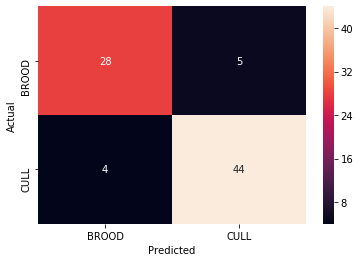

In [408]:
cm = sklearn.metrics.confusion_matrix(y_true=y, y_pred=clf.predict(X))
ax = sns.heatmap(cm, annot=True, xticklabels=clf.classes_, yticklabels=clf.classes_)
ax.set_xlabel('Predicted')
ax.set_ylabel("Actual")

In [1]:
(28+44)/(28+44+4+5)

0.8888888888888888

In [ ]:
# weight, for lenght, sex differences
# important features from PLS
# brood vs brood control
# RFECV with LARS Lasso
# https://nirpyresearch.com/variable-selection-method-pls-python/
# mutual information (pairwise)
# Lasso regression
# OMP
# https://nirpyresearch.com/principal-component-selection-greedy-algorithm/

In [415]:
clf.best_estimator_.steps[2][1]

KernelPCA(alpha=1.0, coef0=0.0, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='sigmoid',
          kernel_params=None, max_iter=None, n_components=7, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)